<a href="https://colab.research.google.com/github/krish-hayagriva/Machine-Learning-Projects/blob/main/NLP_CaseStudy_AA_SC_P2MCA2107470_Krishnan_Chari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This document contains code for implementing the case study for NLP : Text analysis of tweeter data using ML algorithims.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tweepy

In [ ]:
pip install clean-text

     |████████████████████████████████| 175 kB 12.9 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4d50d48afdc3715e2f2722cd2d5f3325e3350e036b1013bbade849c18187c75e
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tweepy    # Import tweepy packages 

In [ ]:
# setting the API keys from Tweepy for authorization
consumer_key = 'nA3a3DwS7xmtpLP4dTSvaoczc'
consumer_secret = '14OtBS0be6E9IYsTKVjpPnkj3gEdC5gwK3QrnddFqZxhz5R4A1'

In [ ]:
#  providing keys to authorize the same
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  

In [ ]:
api = tweepy.API(auth)  # assigning the authorization keys to key variable api 

In [ ]:
# label = ['#innovation','#science','#nasa','#space','#climate change']
# rawT = []
# ctr = 0
#for hashtag in label:
    #tweets_list = tweepy.Cursor(api.search, q= hashtag,tweet_mode='extended', lang='en').items(1000)
    #for x in tweets_list:
      #text = x._json["full_text"]
      #favourite_count =  x.favorite_count
      #retweet_count = x.retweet_count
      #created_at = x.created_at
      #line = { 'text' : text, 'label':hashtag, 'favourite_count':favourite_count, 'retweet_count': retweet_count,'created_at': created_at }
      #rawT.append(line)
    #ctr = ctr+1
# The above is a iterative loop for calling hashtags and searching tweets using tweepy function call.


In [ ]:
#rawT = pd.DataFrame(rawT)
#rawT

In [ ]:
# rawT.to_csv('rawT1.csv')


In [ ]:
path = ('/content/drive/MyDrive/mca_kc/rawT1.csv')
tc = pd.read_csv(path)
type(tc)

pandas.core.frame.DataFrame

In [ ]:
tc.describe()

,Unnamed: 0,favourite_count,retweet_count
count,5000.000000,5000.000000,5000.000000
mean,2499.500000,0.558000,73.970400
std,1443.520003,4.104632,291.572373
min,0.000000,0.000000,0.000000
25%,1249.750000,0.000000,0.000000
50%,2499.500000,0.000000,3.000000
75%,3749.250000,0.000000,29.000000
max,4999.000000,155.000000,8625.000000


In [ ]:
tc = tc.sample(n=5000) # the entite  tweeter data set is shuffled to ensure random positioning of tweets
tc

,Unnamed: 0,text,label,favourite_count,retweet_count,created_at
4194,4194,RT @PCarterClimate: DROUGHT FRANCE UNPRECEDENT...,#climate change,0,110,11-05-2022 22:09
3699,3699,RT @edholtastro: The Heart Nebula ❤️\n5 Hours ...,#space,0,40,12-05-2022 01:00
179,179,RT @RiteBoss: Golden Sunset Over Snow Covered ...,#innovation,0,694,12-05-2022 04:23
2730,2730,#Perseverance on #Mars\n\nSol: 422\n#Earth dat...,#nasa,0,0,11-05-2022 19:00
2972,2972,#NASA #Wildfire Arctic Hotspots From Siberia W...,#nasa,0,0,11-05-2022 14:50
...,...,...,...,...,...,...
4249,4249,RT @PCarterClimate: US RECORD HEAT HITS IN SPR...,#climate change,0,325,11-05-2022 20:41
1799,1799,RT @Pepesplants: The mRNA red flags fly ever-h...,#science,0,1,12-05-2022 00:43
2046,2046,Young Stars of NGC 346 #space #nasa https://t....,#nasa,0,0,12-05-2022 04:51
1879,1879,RT @qaziabadtiger30: A Lecture on ‘Importance ...,#science,0,110,12-05-2022 00:23


In [ ]:
# converting the text column in corpus into strings
tcs = pd.DataFrame(tc)
tcs = tcs.drop(['favourite_count'],axis =1)
tcs = tcs.drop(['retweet_count'],axis =1)
tcs = tcs.drop(['created_at'],axis =1)
tcs.head()


,Unnamed: 0,text,label
4194,4194,RT @PCarterClimate: DROUGHT FRANCE UNPRECEDENT...,#climate change
3699,3699,RT @edholtastro: The Heart Nebula ❤️\n5 Hours ...,#space
179,179,RT @RiteBoss: Golden Sunset Over Snow Covered ...,#innovation
2730,2730,#Perseverance on #Mars\n\nSol: 422\n#Earth dat...,#nasa
2972,2972,#NASA #Wildfire Arctic Hotspots From Siberia W...,#nasa


In [ ]:
tcs['text'] = tcs['text'].astype(str)
tcs['label'] = tcs['label'].astype(str)

We begin with text preprocessing on tweeter data set

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

In [ ]:

# we define a function to enable us remove all kinds of regular expressions in tweet corpus.
def clean_tweet (txt):
  txt = txt.lower()
  txt = re.sub(r'rt','',txt)
  txt = re.sub(r'\’','',txt)
  txt = re.sub(r'\n','',txt)
  txt = re.sub(r'@[a-z0-9]+','',txt) ###Removes Mentinons
  txt = re.sub(r'[^a-z ]','',txt)
  txt = re.sub(r'#','',txt) ### Remove Hashtag
  txt = re.sub(r"[!\#$%&+-/:;<=>?@[\]^_`{|}~\"\']",'',txt)
  txt = re.sub(r'^\s+|\s+$','',txt) ###Remove additional white spaces
  txt = re.sub(r'https?:\/\/\S+','',txt) ### Remove hyperlinks
  return txt

In [ ]:
# removing emojies from tweetcorpus
from cleantext import clean
def clean_up (txt):
  txt = clean(txt,no_emoji = True)
  return txt

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
tcs['text'] = tcs['text'].apply(clean_tweet)
tcs['text'] = tcs['text'].apply(clean_up)
tcs['label'] = tcs['label'].apply(clean_tweet)
tcs.head()


,Unnamed: 0,text,label
4194,4194,drought france unprecedented may the lack of w...,climate change
3699,3699,the hea nebula hours of exposure taken from my...,space
179,179,golden sunset over snow covered mountainsnatur...,innovation
2730,2730,perseverance on marssol eah date camera naviga...,nasa
2972,2972,nasa wildfire arctic hotspots from siberia wil...,nasa


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download ('all')

In [ ]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words("english")
print(stop)
len(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

179

In [ ]:
tcs['text'] = tcs['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  # applying tokenization
tcs.head()

,Unnamed: 0,text,label
4194,4194,drought france unprecedented may lack water pa...,climate change
3699,3699,hea nebula hours exposure taken garden uk dslr...,space
179,179,golden sunset snow covered mountainsnature pho...,innovation
2730,2730,perseverance marssol eah date camera navigatio...,nasa
2972,2972,nasa wildfire arctic hotspots siberia wildfire...,nasa


In [ ]:
# removing all words that are not in a word dictionary

In [ ]:
# importing lemmitization functions from NLTK
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
lemmatiser = WordNetLemmatizer()  # defining the object function

In [ ]:
def stem (text):
  text = text.split()
  text = [lemmatiser.lemmatize(word) for word in text]
  text = ' '.join(text)
  return text

st = lambda x: stem(x)   # setting the stemming into a lambda function

In [ ]:
tcs['text'] = tcs['text'].apply(st)
tcs.head()

,Unnamed: 0,text,label
4194,4194,drought france unprecedented may lack water pa...,climate change
3699,3699,hea nebula hour exposure taken garden uk dslr ...,space
179,179,golden sunset snow covered mountainsnature pho...,innovation
2730,2730,perseverance marssol eah date camera navigatio...,nasa
2972,2972,nasa wildfire arctic hotspot siberia wildfire ...,nasa


In [ ]:
type(tcs)

pandas.core.frame.DataFrame

In [ ]:
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
tcs_cv = vectorizer.fit_transform(tcs.text) 
tcs_cv = pd.DataFrame(tcs_cv.toarray(), columns = vectorizer.get_feature_names_out())
tcs_cv.index = tcs['label']
tcs_cv.head()

,aa,ab,abbeon,abc,abcnews,abducted,abducteesprofessor,abduction,ability,able,...,zero,zeroemissionclimate,zhurong,zia,zoltan,zone,zoology,zoomed,zubrin,zyne
label,,,,,,,,,,,,,,,,,,,,,
climate change,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
space,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
innovation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nasa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nasa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#tcs_cvex = tcs_cv.to_csv('tcs_cvex.csv') # taking a dump of the countvectorizer

In [ ]:
print(vectorizer.get_feature_names())
len(vectorizer.get_feature_names())

['aa', 'ab', 'abbeon', 'abc', 'abcnews', 'abducted', 'abducteesprofessor', 'abduction', 'ability', 'able', 'abnormal', 'abo', 'aboard', 'aboion', 'absolute', 'abstract', 'abstracta', 'abstractaist', 'abstractnft', 'abundancebook', 'ac', 'academia', 'academic', 'academicjobs', 'academictwitter', 'academy', 'accelerate', 'accelerates', 'accelerating', 'acceleration', 'acceptable', 'accepted', 'accepting', 'access', 'accessible', 'accessoriesmore', 'accidentby', 'accommodation', 'accomplishment', 'according', 'accordingly', 'accountable', 'accounting', 'accredited', 'accurate', 'accurately', 'achieve', 'achieved', 'achievement', 'achieving', 'aching', 'acid', 'across', 'acrylicpainting', 'act', 'actbrilliant', 'acting', 'action', 'actionable', 'activation', 'active', 'actively', 'activist', 'activity', 'actually', 'acusuit', 'ad', 'ada', 'adam', 'adapt', 'adaptable', 'adaptation', 'adapter', 'adaptive', 'add', 'added', 'addiction', 'adding', 'additional', 'additionally', 'additivemanufact

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


10535

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range = (1,3), analyzer='word', min_df=2)
vectorized_text = tf_idf_vectorizer.fit_transform(tcs.text)

tcs_tv = pd.DataFrame(vectorized_text.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())
tcs_tv

,abbeon,abbeon reservoir,abbeon reservoir stargazer,abc,abc orlando,abc orlando news,abduction,abduction story,abduction story ufo,ability,...,zero,zero asset,zero asset manager,zero emission,zero gravityits,zero gravityits caused,zhurong,zhurong space,zhurong space mar,zoomed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#for i in tcs_tv.columns:         # checking for any columns which have no counts 
  #c = tcs_tv.loc[:,i].sum()
  #if c<=0:
    #print(i)

In [ ]:
#for i in tcs_cv.columns:        # checking for any columns which have no counts 
  #c = tcs_cv.loc[:,i].sum()
  #if c<=0:
    #print(i)

In [ ]:
pip install gensim

In [ ]:
import gensim         # important to import gensim first and then call specific functions 
from gensim.models import Word2Vec

In [ ]:
tok_text = tcs['text'].apply(lambda x: x.split())
m_cbow =  gensim.models.Word2Vec(tok_text, min_count =2, size =200,window = 5,sg =1, negative =10,hs =0,workers=2,seed =34)
type(m_cbow)
print(m_cbow)

Word2Vec(vocab=5152, size=200, alpha=0.025)


In [ ]:
m_sgm = gensim.models.Word2Vec(tcs['text'],min_count =2, size =200,window =5, sg =1)
type(m_sgm)

gensim.models.word2vec.Word2Vec

In [ ]:
print(m_sgm)

Word2Vec(vocab=27, size=50, alpha=0.025)


In [ ]:
m_cbow.train(tok_text,total_examples = len(tcs['text']),epochs =20)

(1017020, 1250040)

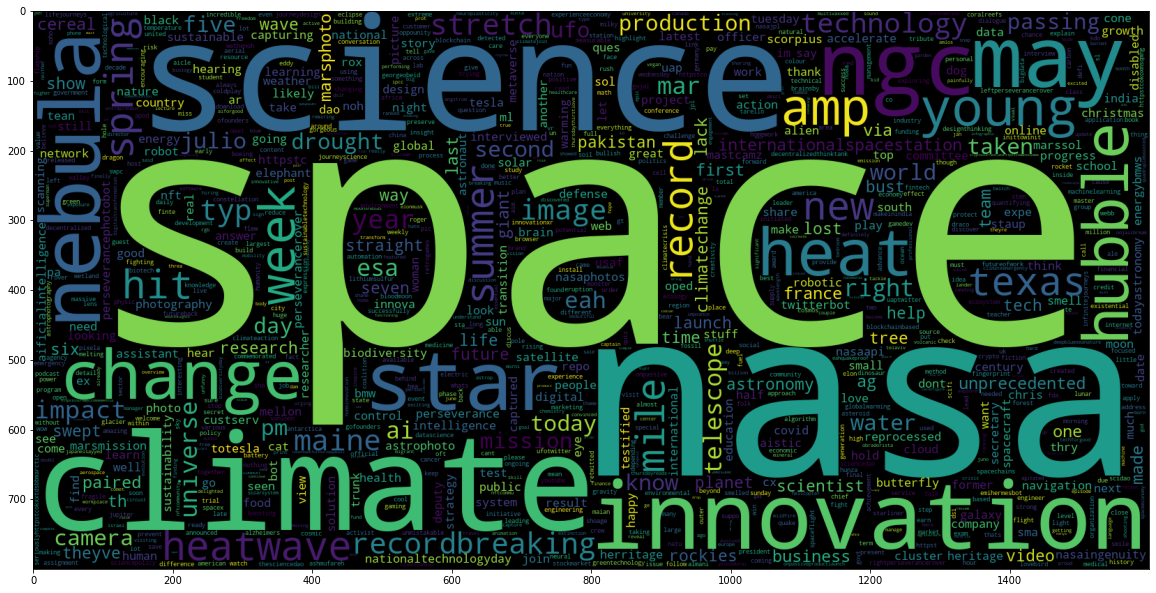

In [ ]:
from wordcloud import WordCloud
tcs_wc = tcs['text'][:4500]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000, width = 1600, height =800,collocations = False).generate(" ".join(tcs_wc))
plt.imshow(wc)


In [ ]:
m_cbow['heatwave']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-5.36837816e-01,  4.43982571e-01, -4.10304725e-01, -1.90993503e-01,
       -1.12003922e+00,  7.05710948e-01,  3.09533812e-03, -3.52963030e-01,
       -1.01386093e-01,  4.90834922e-01,  7.78486580e-03, -1.16928533e-01,
        1.55100420e-01,  3.67669404e-01, -4.75966483e-01, -5.04320025e-01,
       -1.94740832e-01,  2.23844364e-01,  1.76468238e-01,  4.42374825e-01,
        1.01920688e+00,  5.25929332e-01, -6.82845056e-01, -9.27348614e-01,
        8.33522081e-02, -4.69663054e-01, -1.50236040e-01, -1.04119055e-01,
       -1.30185992e-01,  3.84231023e-02,  6.49938047e-01,  3.49824250e-01,
        1.29284084e-01, -5.19444823e-01, -1.90083504e-01,  8.24901402e-01,
        6.98044956e-01,  1.96798462e-02,  1.69873074e-01, -7.15962350e-02,
       -4.23142612e-01, -3.67514223e-01, -1.49549171e-01, -8.72843042e-02,
        3.42993587e-01,  1.89965963e-01,  1.74810678e-01,  6.09275997e-01,
       -3.06286722e-01,  5.70835531e-01, -5.78798175e-01, -1.07340492e-01,
        5.07843912e-01,  

In [ ]:
m_cbow.wv.most_similar(positive ='heatwave')

[('typ', 0.8995862603187561),
 ('stretch', 0.8948625326156616),
 ('maine', 0.8945176601409912),
 ('texas', 0.8890374302864075),
 ('recordbreaking', 0.8784085512161255),
 ('mile', 0.8699629306793213),
 ('summer', 0.8586083650588989),
 ('scary', 0.8490322828292847),
 ('spring', 0.8322669267654419),
 ('lowincome', 0.8251942992210388)]